In [4]:
import psycopg2
conn = psycopg2.connect('host=212.58.23.112 dbname=PlatformA user=umut_ro password=umut*123')
curr = conn.cursor()


In [56]:
curr.execute("rollback")

In [57]:
curr.execute("select COUNT(*) FROM public.tcdr_summary")

In [58]:
curr.fetchall()

[(2216744,)]

In [59]:
curr.execute("select COUNT(*) FROM public.tcdr_connection_summary")

In [60]:
curr.fetchall()

[(1974901,)]

In [13]:
curr.execute("select * from public.tcdr_summary limit 0")

In [15]:
curr.description

(Column(name='i_summary', type_code=20, display_size=None, internal_size=8, precision=None, scale=None, null_ok=None),
 Column(name='i_account', type_code=20, display_size=None, internal_size=8, precision=None, scale=None, null_ok=None),
 Column(name='summary_date', type_code=1082, display_size=None, internal_size=4, precision=None, scale=None, null_ok=None),
 Column(name='destination', type_code=1043, display_size=None, internal_size=100, precision=None, scale=None, null_ok=None),
 Column(name='total_duration', type_code=700, display_size=None, internal_size=4, precision=None, scale=None, null_ok=None),
 Column(name='total_call', type_code=23, display_size=None, internal_size=4, precision=None, scale=None, null_ok=None),
 Column(name='success_call', type_code=23, display_size=None, internal_size=4, precision=None, scale=None, null_ok=None),
 Column(name='asr', type_code=700, display_size=None, internal_size=4, precision=None, scale=None, null_ok=None),
 Column(name='acd', type_code=70

In [17]:
import pandas as pd 
import pandas.io.sql as sqlio

In [131]:
sql = "select * from public.tcdr_connection_summary where  summary_date > '2018-07-01'"
data = sqlio.read_sql_query(sql,conn)

In [81]:
curr.execute("rollback")

In [82]:
curr.execute("select clientname from public.tclient where summary_date > '2018-07-01'")

In [83]:
curr.fetchall()

[('ASIA SUNRISE',)]

In [ ]:
data.to_csv('2aylik.csv')

In [101]:
import matplotlib.pyplot as plt
%matplotlib inline

In [113]:
data['ii_vendor'] =data.i_vendor.astype('category')

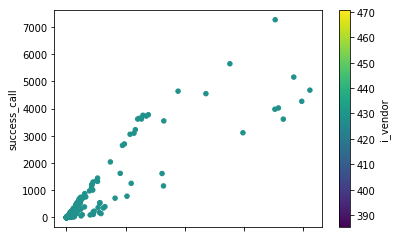

In [130]:
data[data.i_vendor == 428].plot(x='total_call',y='success_call',kind='scatter',c='i_vendor',colormap="viridis")